In [83]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [84]:
df = pd.read_csv("clothes_price_prediction_data.csv")
df

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113
...,...,...,...,...,...,...
995,Puma,Jeans,Black,L,Polyester,176
996,Puma,Jacket,Red,XXL,Silk,110
997,Reebok,Sweater,Blue,XS,Denim,127
998,Under Armour,Sweater,Black,XXL,Denim,69


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [86]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"Duplicates: {df.duplicated().sum()}") 
print(f"missing data: {sum(df.isna().sum())}")

Rows: 1000, Columns: 6
Duplicates: 0
missing data: 0


In [87]:
df = df.rename(columns={'Category' : 'Kategori'})
df = df.rename(columns={'Color' : 'Warna'})
df = df.rename(columns={'Size' : 'Ukuran'})
df = df.rename(columns={'Material' : 'Bahan'})
df = df.rename(columns={'Price' : 'harga'})
df

,Brand,Kategori,Warna,Ukuran,Bahan,harga
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113
...,...,...,...,...,...,...
995,Puma,Jeans,Black,L,Polyester,176
996,Puma,Jacket,Red,XXL,Silk,110
997,Reebok,Sweater,Blue,XS,Denim,127
998,Under Armour,Sweater,Black,XXL,Denim,69


In [88]:
df['Brand'].value_counts()

Brand
Under Armour    179
Puma            168
Adidas          166
Nike            165
New Balance     164
Reebok          158
Name: count, dtype: int64

In [89]:
df['Kategori'].value_counts()

Kategori
Jacket     191
Shoes      172
Jeans      167
Dress      166
Sweater    160
T-shirt    144
Name: count, dtype: int64

In [90]:
df['Warna'].value_counts()

Warna
Yellow    173
White     171
Red       168
Black     163
Blue      163
Green     162
Name: count, dtype: int64

In [91]:
df['Ukuran'].value_counts()

Ukuran
XS     196
XXL    173
XL     167
S      166
M      157
L      141
Name: count, dtype: int64

In [92]:
df['Bahan'].value_counts()

Bahan
Polyester    175
Silk         173
Wool         172
Denim        163
Cotton       162
Nylon        155
Name: count, dtype: int64

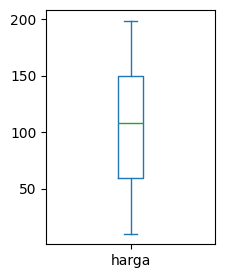

In [93]:
df.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5); 
plt.show()


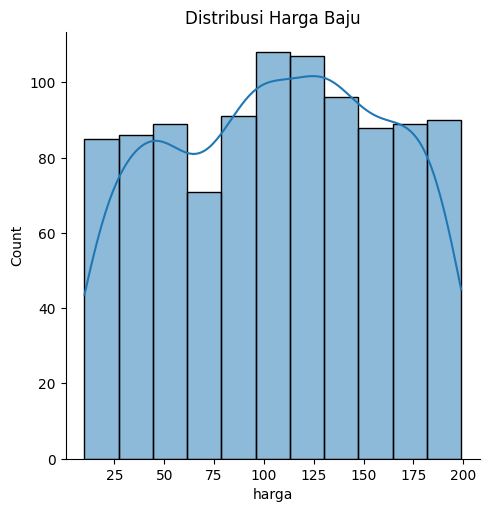

In [94]:
sns.displot ( x = 'harga', kde = True, data = df)
plt.title("Distribusi Harga Baju")
plt.show()

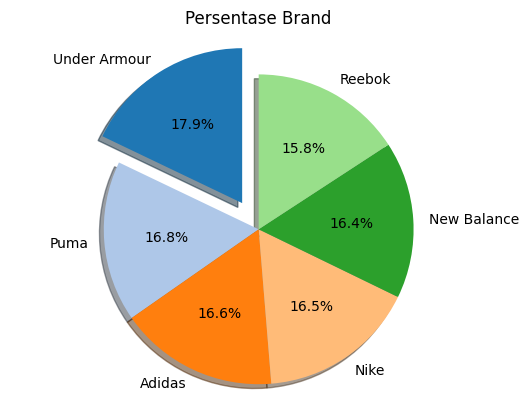

In [95]:
#presentase antar brand yang tersedia dapat dilihat dibawah ini
df_piechart = df['Brand'].value_counts()

labels = df_piechart.index
quantity = df_piechart.values
colors = plt.cm.tab20(range(len(labels)))
explode = (0.2, 0, 0, 0, 0, 0)

plt.title('Persentase Brand')
plt.pie(quantity, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)

plt.axis('equal')
plt.show()

<Axes: xlabel='count', ylabel='Kategori'>

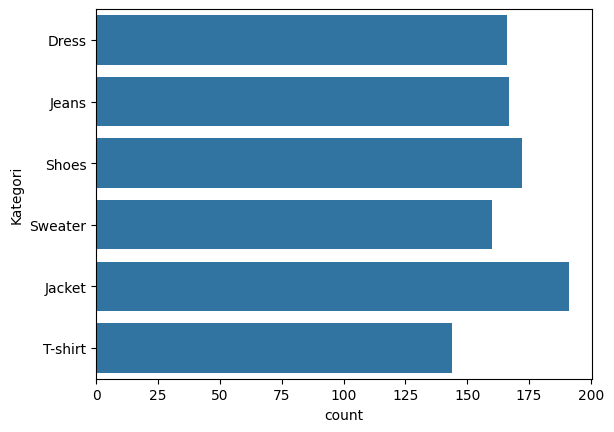

In [96]:
sns.countplot(y = df['Kategori'])

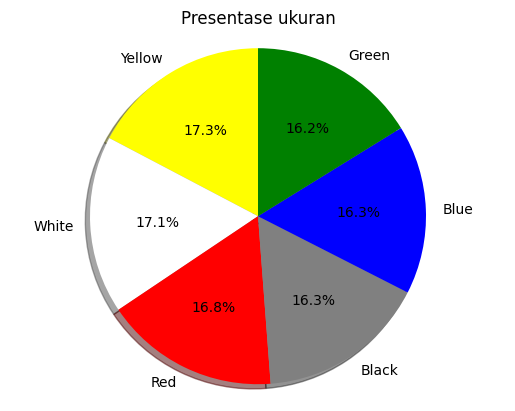

In [97]:
#presentase antar brand yang tersedia dapat dilihat dibawah ini
df_piechart = df['Warna'].value_counts()

labels = df_piechart.index
quantity = df_piechart.values
colors = ("Yellow", "White", "Red", "gray", "Blue", "Green")

plt.title('Presentase ukuran')
plt.pie(quantity, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [98]:
df

,Brand,Kategori,Warna,Ukuran,Bahan,harga
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113
...,...,...,...,...,...,...
995,Puma,Jeans,Black,L,Polyester,176
996,Puma,Jacket,Red,XXL,Silk,110
997,Reebok,Sweater,Blue,XS,Denim,127
998,Under Armour,Sweater,Black,XXL,Denim,69


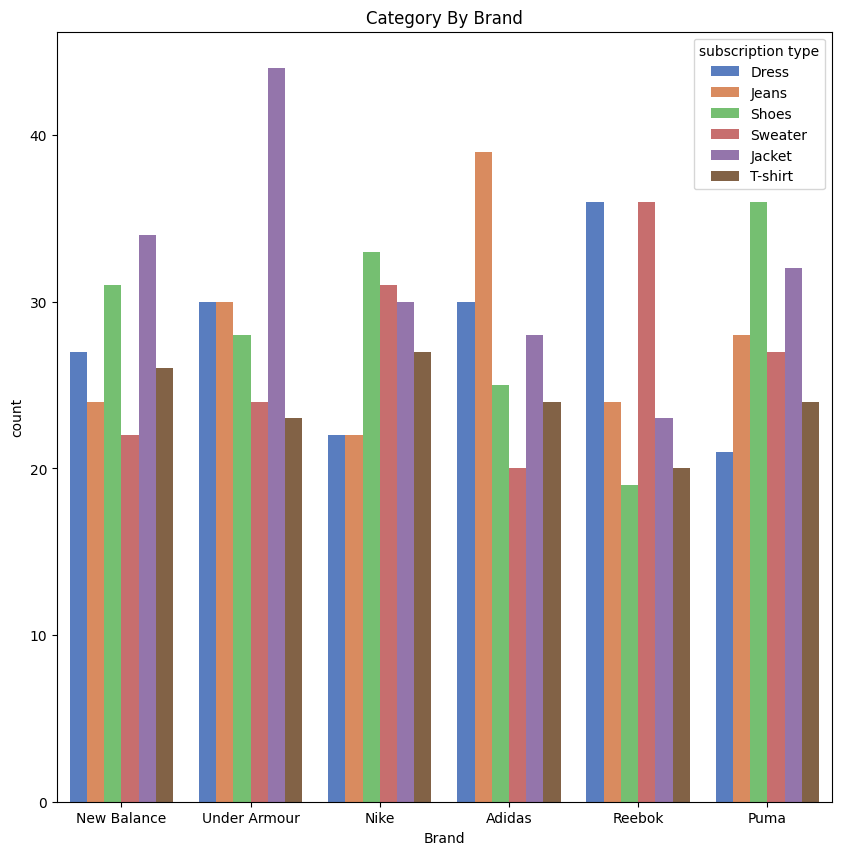

In [99]:
plt.figure(figsize=(22,10))
plt.subplot(1,2,2)
sns.countplot(data=df,x="Brand",
hue="Kategori",
palette="muted")
plt.title("Category By Brand")
plt.xlabel("Brand")
plt.ylabel("count")
plt.legend(title="subscription type")
plt.show()

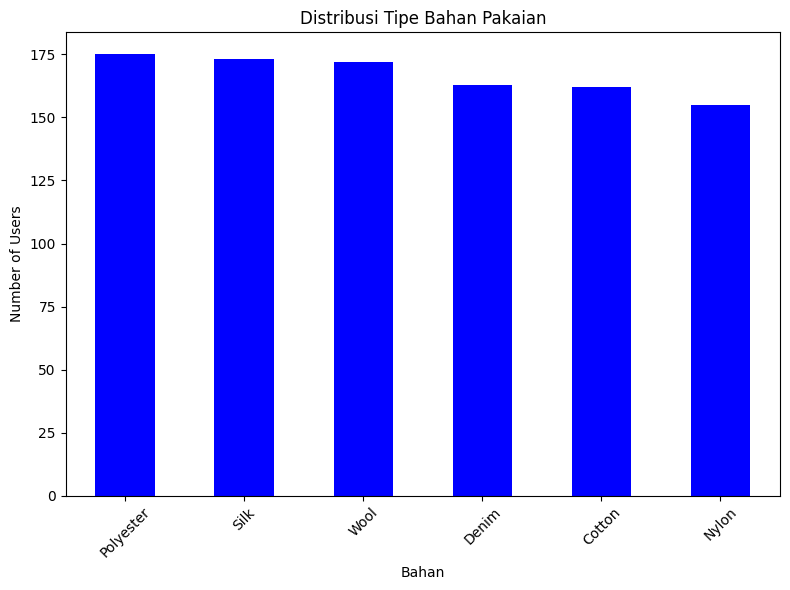

Bahan
Polyester    175
Silk         173
Wool         172
Denim        163
Cotton       162
Nylon        155
Name: count, dtype: int64


In [100]:
# counts Subscription Type from Subscription Type column
subscription_types = df['Bahan'].value_counts()

# plot Subscription Type using bar
plt.figure(figsize = (8, 6))
subscription_types.plot(kind='bar',color='blue' )
plt.title('Distribusi Tipe Bahan Pakaian')
plt.xlabel('Bahan')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(subscription_types)

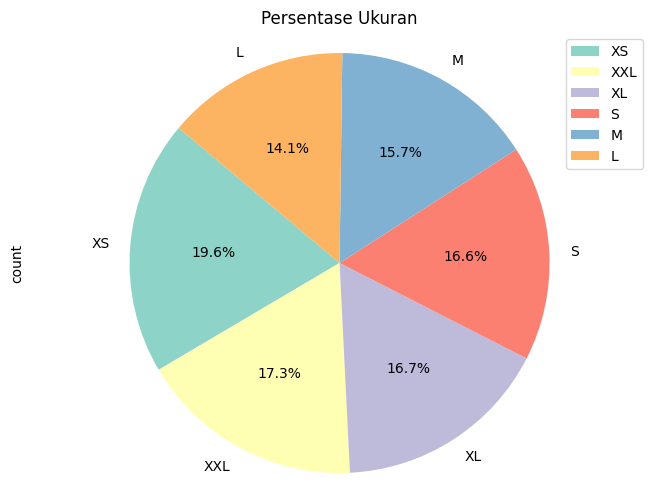

In [101]:
# counts total gender from gender column
gender_counts = df['Ukuran'].value_counts()

# plot gender counts using pie
plt.figure(figsize = (8, 6))
gender_counts.plot(kind='pie', autopct = '%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Persentase Ukuran')
plt.axis('equal')
plt.legend(gender_counts.index, loc='best')
plt.show()

In [102]:
df

,Brand,Kategori,Warna,Ukuran,Bahan,harga
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113
...,...,...,...,...,...,...
995,Puma,Jeans,Black,L,Polyester,176
996,Puma,Jacket,Red,XXL,Silk,110
997,Reebok,Sweater,Blue,XS,Denim,127
998,Under Armour,Sweater,Black,XXL,Denim,69


In [103]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])
df['Kategori'] = le.fit_transform(df['Kategori'])
df['Warna'] = le.fit_transform(df['Warna'])
df['Ukuran'] = le.fit_transform(df['Ukuran'])
df['Bahan'] = le.fit_transform(df['Bahan'])
df


,Brand,Kategori,Warna,Ukuran,Bahan,harga
0,1,0,4,4,2,182
1,1,2,0,4,4,57
2,5,0,3,1,5,127
3,2,3,2,1,0,77
4,0,4,4,1,2,113
...,...,...,...,...,...,...
995,3,2,0,0,3,176
996,3,1,3,5,4,110
997,4,4,1,4,1,127
998,5,4,0,5,1,69


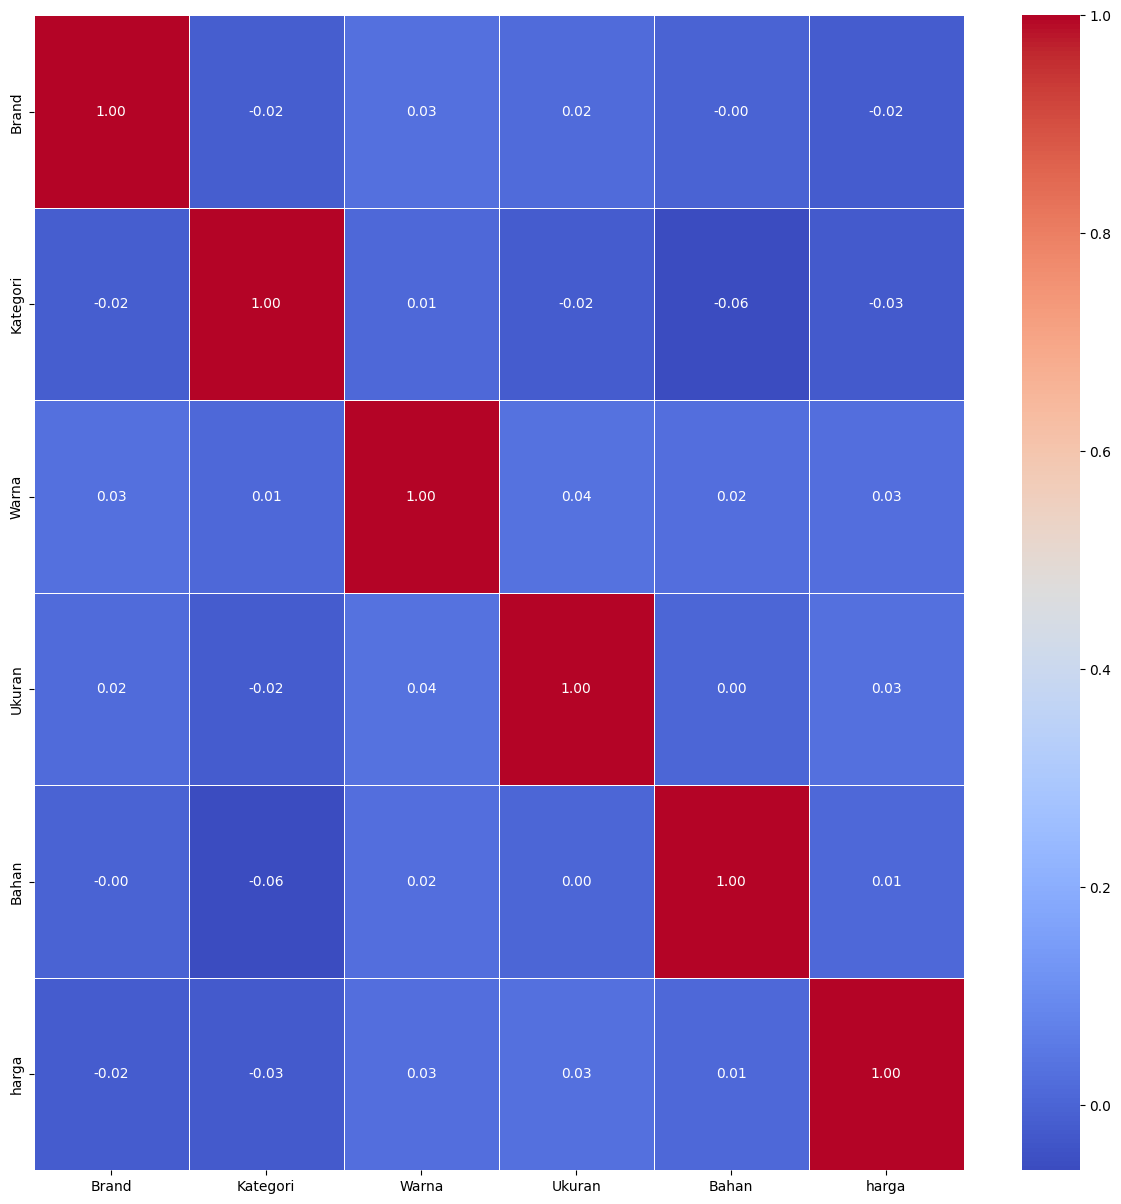

In [104]:
import matplotlib.pyplot as plt #korelasi hubungan antar variabel dapat dilihat dari korelasi di bawah
import seaborn as sns
plt.figure(figsize=(15,15))# bahwa Total_Phenols,Flavanoids, dan OD280 memliki pengaruh yang besar
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

In [105]:
import scipy
from scipy import stats

kolom=len(df.columns)
z=[]
for i in range (0,kolom-1):
  k,y=stats.pearsonr(df.iloc[:,i],df.iloc[:,-1])
  z.append([i,df.columns[i], abs(k)])

z=sorted(z, key=lambda z:z[2], reverse=True)
z=pd.DataFrame(z,columns=["KolomKe","Nama Kolom","KoefisienKorelasi-Pearson"])
z

,KolomKe,Nama Kolom,KoefisienKorelasi-Pearson
0,3,Ukuran,0.028882
1,2,Warna,0.026571
2,1,Kategori,0.025188
3,0,Brand,0.021353
4,4,Bahan,0.008043


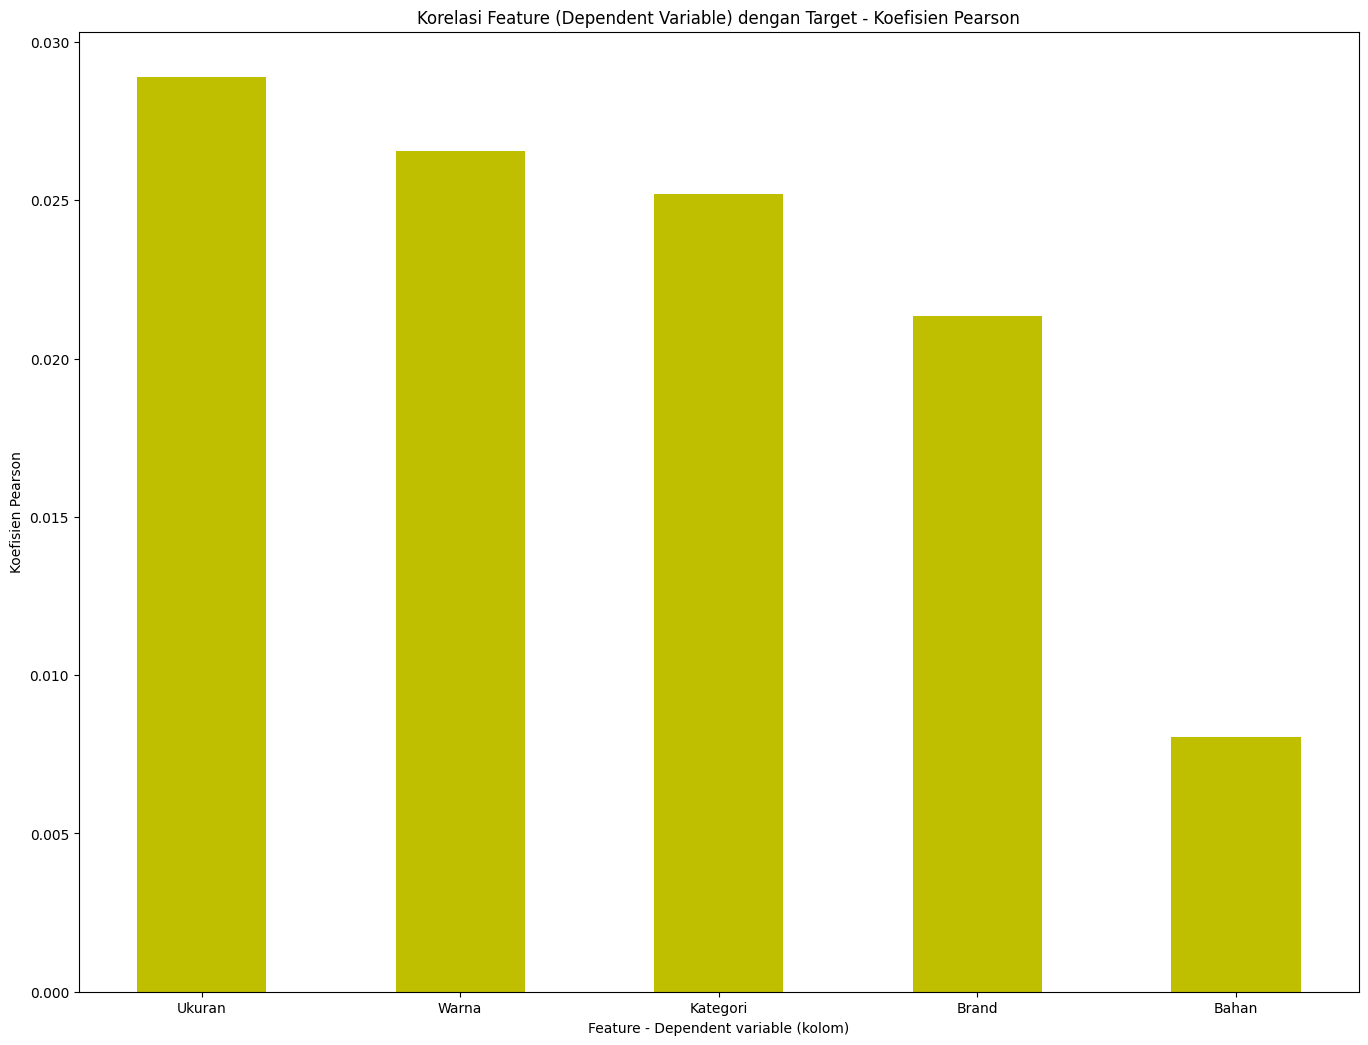

In [106]:
import matplotlib.pyplot as plt
g=z.head(5)
fig = plt.figure()

ax = fig.add_axes([1,1, 2, 2])
x_axis = g.iloc[:,1]
y_axis = g.iloc[:,2]

ax.bar(x_axis , y_axis, color = 'y', width = 0.5)

plt.title('Korelasi Feature (Dependent Variable) dengan Target - Koefisien Pearson')

plt.xlabel('Feature - Dependent variable (kolom)')
plt.ylabel('Koefisien Pearson')
plt.show()

In [107]:
df

,Brand,Kategori,Warna,Ukuran,Bahan,harga
0,1,0,4,4,2,182
1,1,2,0,4,4,57
2,5,0,3,1,5,127
3,2,3,2,1,0,77
4,0,4,4,1,2,113
...,...,...,...,...,...,...
995,3,2,0,0,3,176
996,3,1,3,5,4,110
997,4,4,1,4,1,127
998,5,4,0,5,1,69


In [108]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [109]:
x_test

,Brand,Kategori,Warna,Ukuran,Bahan
37,5,3,0,3,2
726,0,0,4,4,2
846,5,2,3,4,4
295,0,2,4,5,3
924,1,3,1,3,0
...,...,...,...,...,...
839,0,0,1,1,4
810,1,5,1,4,0
930,4,3,4,5,5
616,2,3,4,0,5


LINEAR REGRESSION

In [110]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [111]:
regressor.fit(x_train, y_train)
#Proses Prediksi
y_pred=regressor.predict(x_test)
print(y_pred)

[103.00299749 108.90221065 104.44753342 108.30621889 105.204273
 105.06781026 106.87460585 104.72437091 103.87116259 106.28344194
 104.80040003 103.70644413 108.62188366 104.74973553 102.76421906
 108.75368224 108.76612398 105.6182767  103.21929629 107.01643621
 107.83355462 106.89707936 104.2965285  105.39715004 105.11987174
 108.53684367 100.90583702 106.41438332 105.78836279 102.66105227
 104.85096558 105.29794778 107.98637112 108.52446056 108.55394956
 103.51340338 101.13163395 106.05195996 102.90845938 108.52446056
 102.4400832  106.39711373 108.37834211 105.89533652 102.9982686
 104.57032114 105.8275075  107.59478231 103.67110635 105.89098981
 105.98558654 107.94465886 101.29448222 104.60828124 106.90898133
 104.81376372 103.66241293 105.04352518 104.82614072 100.59548125
 108.09699421 104.67192725 101.17512537 104.62517477 104.70195602
 102.10677278 104.67621533 106.35143466 104.83477552 101.89948484
 106.39819326 108.09801512 107.30968608 104.25980167 106.55046999
 103.00588248

In [112]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

rmse=math.sqrt(mse)

In [113]:
print("Semakin kecil nilai MAE maka semakin baik kemampuan model dalam memprediksi data")
print("Hasil dari MAE Linear Regresion: ")
print("MAE (Mean Absolute Error): ",int(mae))

print("=================================================================================")

print("Semakin kecil nilai MSE maka semakin kecil kesalahan yang dihasilkan model")
print("Hasil dari MSE Linear Regresion: ")
print("MSE (Mean Squared Error): ",int(mse))

print("=================================================================================")

print("Semakin kecil nilainya maka menunjukan semakin kecil kesalahan rata rata dari prediksi model")
print("Hasil dari RMSE Linear Regresion: ")
print("RMSE (Root Mean Squared Error): ",int(rmse))

print("=================================================================================")

print("Coefficient of Determination")
print("Semakin Tinggi dan mendekati 1 makan semakin baik model")
print("R2 Score: ",r2)

Semakin kecil nilai MAE maka semakin baik kemampuan model dalam memprediksi data
Hasil dari MAE Linear Regresion: 
MAE (Mean Absolute Error):  45
Semakin kecil nilai MSE maka semakin kecil kesalahan yang dihasilkan model
Hasil dari MSE Linear Regresion: 
MSE (Mean Squared Error):  2897
Semakin kecil nilainya maka menunjukan semakin kecil kesalahan rata rata dari prediksi model
Hasil dari RMSE Linear Regresion: 
RMSE (Root Mean Squared Error):  53
Coefficient of Determination
Semakin Tinggi dan mendekati 1 makan semakin baik model
R2 Score:  -0.018611551305185214


ALGORITMA XGBOOST

In [114]:
import xgboost as xg
modelXG = xg.XGBRegressor(max_depth=3, learning_rate = 0.1, n_estimators=100)
modelXG.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [115]:
y_predXG = modelXG.predict(x_test)
#Evaluasi 
maeXGB = mean_absolute_error(y_test, y_predXG)
mseXGB=mean_squared_error(y_test, y_predXG)
r2XGB=r2_score(y_test, y_predXG)
rmseXGB=math.sqrt(mseXGB)

In [116]:
print("Semakin kecil nilai MAE maka semakin baik kemampuan model dalam memprediksi data")
print("Hasil dari MAE XGBoost: ")
print("MAE (Mean Absolute Error): ",int(maeXGB))

print("=================================================================================")

print("Semakin kecil nilai MSE maka semakin kecil kesalahan yang dihasilkan model")
print("Hasil dari MSE XGBoost: ")
print("MSE (Mean Squared Error): ",int(mseXGB))

print("=================================================================================")

print("Semakin kecil nilainya maka menunjukan semakin kecil kesalahan rata rata dari prediksi model")
print("Hasil dari RMSE XGBoost: ")
print("RMSE (Root Mean Squared Error): ",int(rmseXGB))

print("=================================================================================")

print("Coefficient of Determination")
print("Semakin Tinggi dan mendekati 1 makan semakin baik model")
print("R2 Score: ",r2XGB)

Semakin kecil nilai MAE maka semakin baik kemampuan model dalam memprediksi data
Hasil dari MAE XGBoost: 
MAE (Mean Absolute Error):  46
Semakin kecil nilai MSE maka semakin kecil kesalahan yang dihasilkan model
Hasil dari MSE XGBoost: 
MSE (Mean Squared Error):  3066
Semakin kecil nilainya maka menunjukan semakin kecil kesalahan rata rata dari prediksi model
Hasil dari RMSE XGBoost: 
RMSE (Root Mean Squared Error):  55
Coefficient of Determination
Semakin Tinggi dan mendekati 1 makan semakin baik model
R2 Score:  -0.0779506661954108


In [117]:
jawaban = pd.DataFrame({'Jawaban Asli':(y_test).reset_index(drop=True)})
jawaban

,Jawaban Asli
0,195
1,100
2,69
3,156
4,29
...,...
195,58
196,124
197,139
198,98


In [118]:
predLinear = pd.DataFrame({'pred Linear Regresion':(y_pred)})
predLinear

,pred Linear Regresion
0,103.002997
1,108.902211
2,104.447533
3,108.306219
4,105.204273
...,...
195,108.204073
196,104.305539
197,105.176181
198,103.620482


In [119]:
predXGB = pd.DataFrame({'pred XGBoost':(y_predXG)})
predXGB

,pred XGBoost
0,124.744202
1,132.365250
2,86.244392
3,99.143257
4,123.936783
...,...
195,105.816360
196,110.757408
197,108.715225
198,105.072945


In [120]:
df_result=pd.concat([jawaban,predLinear,predXGB], axis=1)
df_result

,Jawaban Asli,pred Linear Regresion,pred XGBoost
0,195,103.002997,124.744202
1,100,108.902211,132.365250
2,69,104.447533,86.244392
3,156,108.306219,99.143257
4,29,105.204273,123.936783
...,...,...,...
195,58,108.204073,105.816360
196,124,104.305539,110.757408
197,139,105.176181,108.715225
198,98,103.620482,105.072945


PRED LINEAR

In [121]:
import plotly.express as px
fig=px.line(df_result[['Jawaban Asli','pred Linear Regresion']])
fig.show()
print ("Score R2 dari model LinearRegression: ", r2)

Score R2 dari model LinearRegression:  -0.018611551305185214


PRED XGBOOST

In [122]:
import plotly.express as px
fig=px.line(df_result[['Jawaban Asli','pred XGBoost']])
fig.show()
print ("Score R2 dari model XGBoost: ", r2XGB)

Score R2 dari model XGBoost:  -0.0779506661954108
